In [47]:
import numpy as np
from scipy.stats import bernoulli,binom_test,binom,norm,probplot,t,chi2,f,ttest_ind,ttest_1samp  
import matplotlib.pyplot as plt
import seaborn as sns

# 이항분포

* 시행의 결과가 2개; 성공/실패 
* 시행수가 고정
* 시행의 결과(성공) 확률이 주어짐 

![이항분포 공식](https://wikimedia.org/api/rest_v1/media/math/render/svg/38d86cba65d40f015a2b807d2b736250805abe45)

공식설명 : n번의 시행 중 성공할 확률이 p라고 할때 k번 성공할 확률

In [3]:
N     = 10   # 고정된 시행수 -> mass function 
theta = 0.6  # 확률 (성공,양성,etc..)
rv = binom(N, theta)

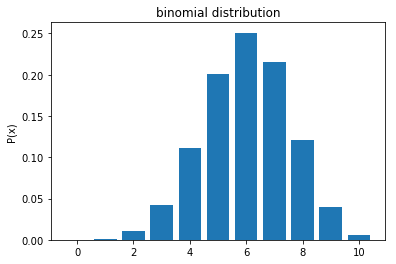

In [4]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center") # 공식을 통한 확률 계산.
plt.ylabel("P(x)")
plt.title("binomial distribution")
plt.show()

In [5]:
#시뮬레이션 
np.random.seed(1)
x = rv.rvs(100) # rvs : randome variate 생성 (https://en.wikipedia.org/wiki/Random_variate)
x

array([ 6,  5, 10,  7,  8,  8,  7,  7,  6,  6,  6,  5,  7,  4,  9,  5,  6,
        6,  8,  7,  5,  3,  7,  5,  4,  4,  8,  9,  7,  4,  8,  6,  3,  6,
        5,  7,  5,  4,  9,  5,  2,  5,  7,  5,  8,  6,  4,  7,  7,  8,  9,
        5,  7,  7,  6,  8,  6,  8,  6,  5,  8,  6,  5,  6,  8,  6,  5,  6,
        4,  6,  4,  8,  8,  5,  6,  8,  4,  7,  5,  5,  4,  6,  5,  7,  7,
        4,  6,  3,  5,  6,  8,  3,  6,  6,  6,  7,  4,  6, 10,  6])

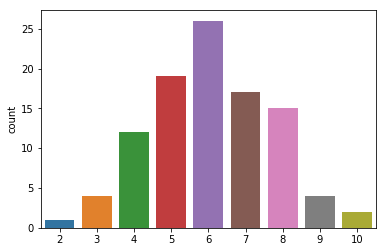

In [6]:
sns.countplot(x)
plt.show()

In [7]:
# 모집단 정보 
N = 10  # 총 10번의 시행중 
p = 0.6 # 알려진 성공확률이 0.6일때 
# 관찰
x = 10  # 10번 성공할 확률 
binom_test(x,N,p)

0.0077243391999999977

# 가우시안 분포

* 정규분포
* 평균과 분산으로만 정의 가능

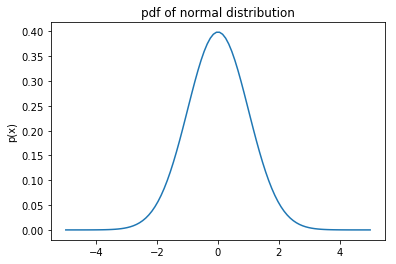

In [8]:
mu  = 0 # 평균
std = 1 # 분산 
rv  = norm(mu, std)
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of normal distribution")
plt.show()

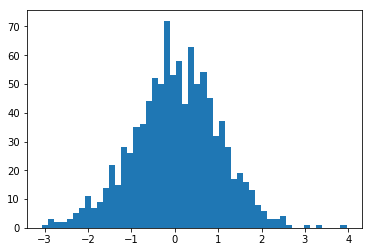

In [9]:
x = rv.rvs(1000)
plt.hist(x,bins=50)
plt.show()

**정규분포검정** : Q-Q plot

* 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)
* sample array 를 sort하고 분위별로 theoretical value를 가져옴. 

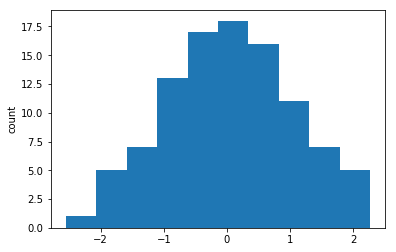

In [10]:
np.random.seed(0)
x = np.random.randn(100) # 렌덤 넘버 생성, 정규분포를 따르도록 렌덤넘버 생성 https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html
plt.hist(x)
plt.ylabel('count')
plt.show()

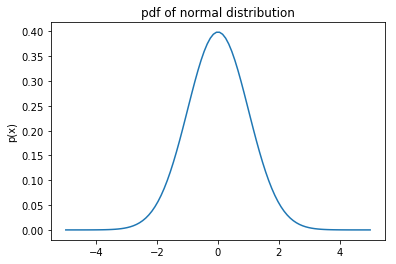

In [11]:
mu  = 0 # 평균
std = 1 # 분산 
rv  = norm(mu, std)
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.title("pdf of normal distribution")
plt.show()

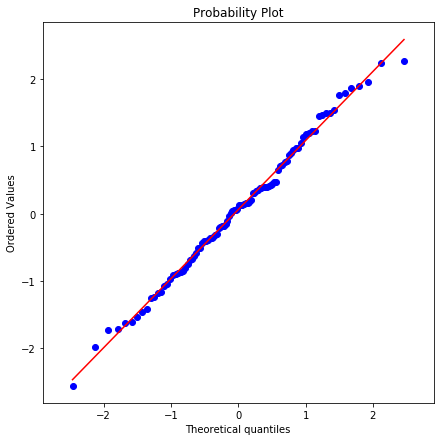

In [12]:
plt.figure(figsize=(7,7))
probplot(x, plot=plt) # Q-Q plot 
plt.axis("equal")
plt.show()

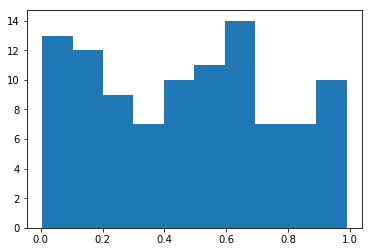

In [13]:
np.random.seed(0)
x = np.random.rand(100) # random samples from uniform distribution, https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html
plt.hist(x)
plt.show()

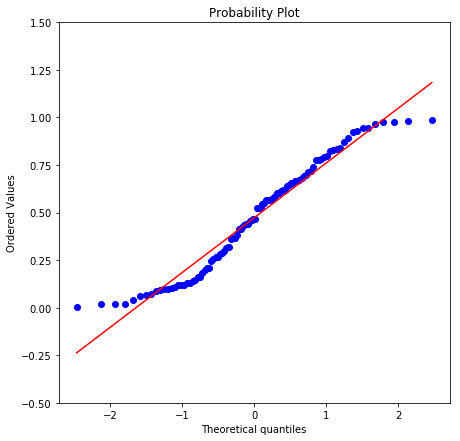

In [14]:
plt.figure(figsize=(7,7))
probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

# 스튜던트 t분포 

* 실제로는 정규분포보다 양 끝단의 비중이 더 큼, 샘플사이즈에 따라 달라짐
* 이런 데이터에 적합한 모델을 만들기 위해 자유도를 줌 
* **정규분포를 따르는 모집단** 에서 **크기가 n인 표본**을 무작위로 반복하여 추출하였을 때, 각 표본에 대해 구한 평균,모집단의 평균을 샘플사이즈와 분산을 고려하여 t-value 및 분포를 계산. 
* t-value 0은 모집단과 샘플 데이터가 동일함, 모집단과 달라질수록 t value는 커짐  
* 한 고정된 사이즈의 샘플 집단은 하나의 t-value 를 얻음
* 반복해서 t-value를 수집한다면 샘플 사이즈에 따라 다양한 분포를 얻을 수 있다. 
* df에 따라 다른 분포! 

/home/k821209/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


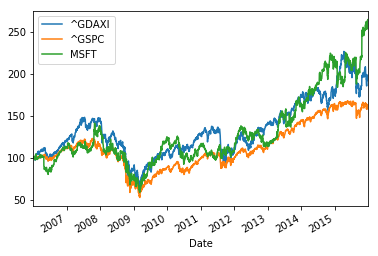

In [15]:
import pandas_datareader.data as web
import pandas as pd 
symbols = ['^GDAXI', '^GSPC', 'MSFT']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo', start='1/1/2006', end='12/31/2015')['Adj Close']
data = data.dropna()
(data / data.ix[0] * 100).plot()
plt.show()

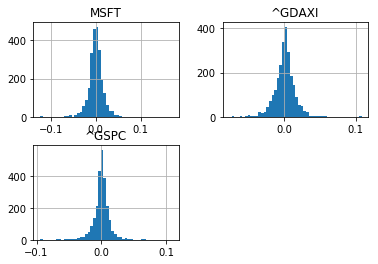

In [16]:
log_returns = np.log(data / data.shift(1)) # 증감비율을 log를 취함. 
log_returns.hist(bins=50)
plt.show()

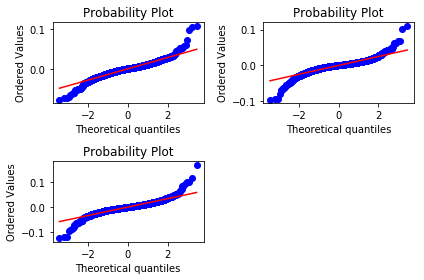

In [17]:
# 정규분포를 따르지 않고 fat tail현상을 보인다. 
for i, sym in enumerate(symbols):
    ax = plt.subplot(2,2,i+1)
    probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

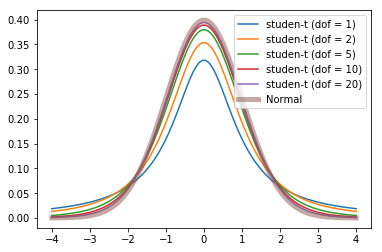

In [18]:
# studen-t 분포는 일반 정규분포보다 자유도에따라서 양끝단을 뚱뚱하게 해준다. 
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("studen-t (dof = %d)" % df))
plt.plot(xx, norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.legend()
plt.show()

**t test one sample**

* 주어진 관찰값의 평균을 모집단의 평균과 비교해서 모집단에서 비롯된 데이터가 맞다 틀리다를 판단 

In [44]:
rvs = norm.rvs(loc=5, scale=10, size=(50))

In [45]:
np.mean(rvs)

5.9835940812515513

In [48]:
ttest_1samp(rvs,5.0)

Ttest_1sampResult(statistic=0.72691058633782524, pvalue=0.47073942912686129)

**t test two sample **
* 두 집단이 평균이 유의하게 다른지를 비교한다. 
* 분산은 두 집단이 같은것으로 가정한다
* 귀무가설: 비교하는 두 평균이 하나의 모집단에서 비롯되었다

In [19]:
a = [30.02,29.99,30.11,29.97,30.01,29.99]
b = [29.89,29.93,29.72,29.98,30.02,29.98]
ttest_ind(a, b, equal_var=True) # identical variance 

Ttest_indResult(statistic=1.9590058081081436, pvalue=0.078565773857230708)

In [20]:
a = [30.02,29.99,30.11,29.97,30.01,29.99]
b = [29.89,29.93,29.72,29.98,30.02,29.98]
ttest_ind(a, b, equal_var=False) # not identical variance (Welch's ttest)

Ttest_indResult(statistic=1.9590058081081434, pvalue=0.090773324285661136)

*note : 각 집단의 모집단이 결코 정규분포일것 같지 않다면 non-parametric test를 시도 해보자* [link](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

![](./pic_170831/parametricNnonpara.PNG)

---

# 카이제곱분포
* 분산의 제곱 분포
* **정규분포를 따르는 모집단**에서 크기가 **n인 표본**을 무작위로 반복하여 추출하였을 때, 각 표본에 대해 구한 표본분산들은 카이제곱 분포를 따른다. 카이제곱확률변수는 다음과 같이 **자유도 (n-1)**인 카이제곱 분포를 따른다.

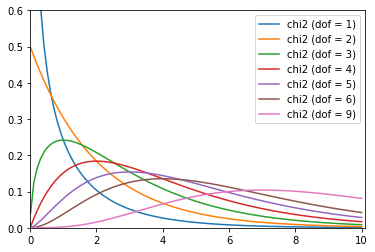

In [21]:
xx = np.linspace(0.01, 10, 100)
for df in [1, 2, 3, 4, 5, 6, 9]:
    rv = chi2(df=df)
    plt.plot(xx, rv.pdf(xx), label=("chi2 (dof = %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.legend()
plt.show()

# 카이제곱검정

![](https://i0.wp.com/www.statisticshowto.com/wp-content/uploads/2013/09/chi-square-formula.jpg)

In [22]:
from scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 16, 16, 16, 16, 8])

Power_divergenceResult(statistic=3.5, pvalue=0.62338762774958223)

**예제** 

분리의 법칙(이론) : 황색 콩과 녹색 콩을 교배한 F2세대의 분리비는 3:1이다.

관찰자가 F2세대의 콩을 8023개를 얻었을 때 그 관찰수

황색 콩 = 6022개

녹색 콩 = 2001개

관찰값은 분리비 모델을 따르는가? 

In [23]:
chisquare([6022,2001], f_exp=[(8023/4)*3,(8023/4)*1]) # 귀무가설이 참 

Power_divergenceResult(statistic=0.016126350789692434, pvalue=0.89894865395758872)

In [24]:
chisquare([2011,6022], f_exp=[(8023/4)*3,(8023/4)*1]) # 귀무가설 거짓 

Power_divergenceResult(statistic=10713.363757273482, pvalue=0.0)

# F 분포
* 카이제곱 분포를 따르는 두개의 집단의 분산을 비교할 때 사용한다. 
* 두 집단의 분산이 같은지, 다른지?
* 두 집단의 자유도를 입력값으로 받는다. 
* 두 집단의 자유도를 기반으로한 F 분포를 통해 두 집단 검정가능 
* F = Var(A집단) / Var(B집단)
![](./pic_170831/Fdist.PNG)

/home/k821209/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
/home/k821209/miniconda2/lib/python2.7/site-packages/matplotlib-2.0.2-py2.7-linux-x86_64.egg/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/k821209/miniconda2/lib/python2.7/site-packages/matplotlib-2.0.2-py2.7-linux-x86_64.egg/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


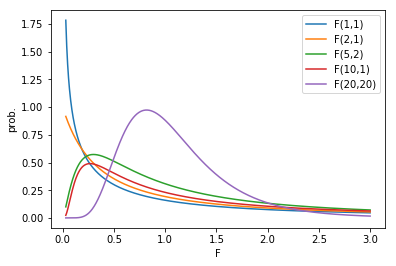

In [25]:
xx = np.linspace(0.03, 3, 1000)
plt.hold(True)
plt.plot(xx, f(1,1).pdf(xx), label="F(1,1)")
plt.plot(xx, f(2,1).pdf(xx), label="F(2,1)")
plt.plot(xx, f(5,2).pdf(xx), label="F(5,2)")
plt.plot(xx, f(10,1).pdf(xx), label="F(10,1)")
plt.plot(xx, f(20,20).pdf(xx), label="F(20,20)")
plt.ylabel('prob.')
plt.xlabel('F')
plt.legend()
plt.show()

In [26]:
# 분산이 다른 a집단과 b집단 
a = [1,2,1,2,1,2,1,2,1,2]
b = [1,3,-1,2,1,5,-1,6,-1,2]
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
print 'p value:', f.cdf(F, df1, df2) # p values 

p value: 4.65819916624e-05


In [27]:
# 분산이 비슷한 a집단과 b집단
a = [1,2,1,2,1,2,1,2,1,2]
b = [1,2,1,2,2,2,1,2,0,2]
F = np.var(a) / np.var(b)
df1 = len(a) - 1
df2 = len(b) - 1
print 'p value:', f.cdf(F, df1, df2) # p values

p value: 0.197191691661


*note : 각집단이 정규분포를 보이고 있는지 여부에 상당히 민감하다고 함. 실제 수집된 데이터에는 사용하지 않는것이 좋을 수 있다고 한다.*